In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
train_dir = "../dataset/train"
test_dir = "../dataset/test"

In [3]:
IMG_SIZE = 48
BATCH_SIZE = 64


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values (0–1)
    rotation_range=10,       # Small rotation
    width_shift_range=0.1,   # Horizontal shift
    height_shift_range=0.1,  # Vertical shift
    zoom_range=0.1,          # Zoom in/out
    horizontal_flip=True    # Flip images
)

test_datagen = ImageDataGenerator(
    rescale=1./255           # ONLY normalization for test data
)


In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 7178 images belonging to 7 classes.
Found 1896 images belonging to 7 classes.


In [6]:
print("Emotion Labels:", train_generator.class_indices)


Emotion Labels: {'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprised': 6}


In [7]:
{'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprised': 6}


{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

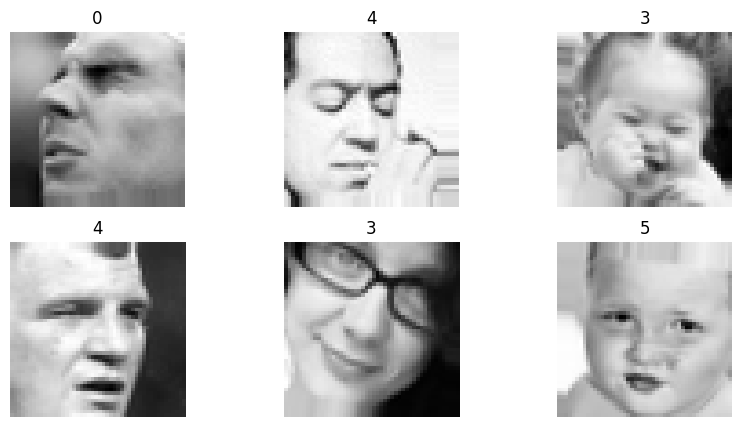

In [8]:
images, labels = next(train_generator)

plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i].reshape(48,48), cmap='gray')
    plt.title(np.argmax(labels[i]))
    plt.axis('off')

plt.show()
